In [1]:
import torch
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual

def sigmoid(x):
    return 1 / (1 + math.exp(-x))
%matplotlib inline

In [2]:
pic = np.zeros([100, 100])
pic[:] = 0
for i in range(100):
    for j in range(100):
        x = i - 50 
        y = j - 50
        if np.sqrt(x*x + y* y) <= 25:
            pic[i, j] = 1

In [10]:
pic = scipy.misc.ascent()[::2, ::2] > 120

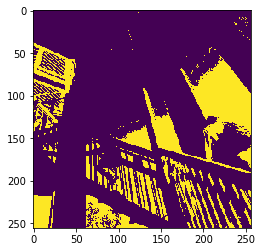

In [11]:
plt.imshow(pic)

In [12]:
Q =3000
noise = np.random.randint(pic.shape[0], size=[Q, 2])
pic[noise[:, 0], noise[:, 1]] = 1
noise = np.random.randint(pic.shape[0], size=[Q, 2])
pic[noise[:, 0], noise[:, 1]] = 0

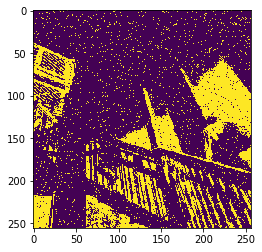

In [13]:
plt.imshow(pic)

In [14]:
theta = pic * 10 - 5
theta_bi = 20

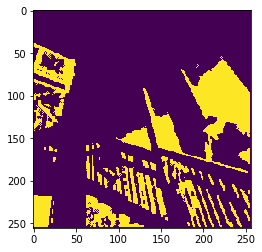

In [15]:
mu = np.zeros(pic.shape)
mu[:] = 0.5
mus = []
for epoch in range(30):
    mu_2 = np.zeros(pic.shape)
    for i in range(pic.shape[0]-1):
        for j in range(pic.shape[1]-1):
            mu_2[i, j] = sigmoid(theta[i, j] + theta_bi* mu[i-1, j] - theta_bi * (1-mu[i-1, j])  + theta_bi* mu[i+1, j] - theta_bi * (1-mu[i+1, j]) + theta_bi* mu[i, j-1] - theta_bi * (1- mu[i, j-1]) + theta_bi* mu[i, j+1] - theta_bi*(1 - mu[i, j+1]))
    mu = mu_2
    mus.append(mu)
plt.imshow(mu)

In [16]:
def show(i=0):
    plt.imshow(mus[i])
interactive(show, i=(0, 30, 2))

A Jupyter Widget